In [2]:
import pandas as pd

In [3]:
#Put the csv path inside "read_csv" command
df = pd.read_csv("co2.csv")
df

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3
...,...,...,...,...,...
79,Mc3,Mississippi,chilled,250,17.9
80,Mc3,Mississippi,chilled,350,17.9
81,Mc3,Mississippi,chilled,500,17.9
82,Mc3,Mississippi,chilled,675,18.9


In [32]:
pd.options.display.float_format = '{:20,.2f}'.format

In [33]:
df.describe()

,conc,uptake
count,84.00,84.00
mean,435.00,27.21
std,295.92,10.81
min,95.00,7.70
25%,175.00,17.90
50%,350.00,28.30
75%,675.00,37.12
max,"1,000.00",45.50


In [6]:
# 12 plants were used in each concentration of carbon dioxide
df['conc'].value_counts()

250     12
500     12
1000    12
95      12
350     12
175     12
675     12
Name: conc, dtype: int64

In [8]:
#Half of plants were used in each treatment
df['Treatment'].value_counts()

nonchilled    42
chilled       42
Name: Treatment, dtype: int64

In [9]:
#Half of plants came from Quebec and the others from Mississipi
df['Type'].value_counts()

Quebec         42
Mississippi    42
Name: Type, dtype: int64

In [10]:
#There are 7 plants of each type
df['Plant'].value_counts()

Mn2    7
Mn3    7
Qc2    7
Mc2    7
Qc3    7
Mn1    7
Qn1    7
Qn2    7
Qn3    7
Mc1    7
Mc3    7
Qc1    7
Name: Plant, dtype: int64

In [14]:
df.dtypes

Plant         object
Type          object
Treatment     object
conc           int64
uptake       float64
dtype: object

In [17]:
#The max uptake value came from Quebec with nonchilled treatment and the higher co2 concentration 
df.max()

Plant               Qn3
Type             Quebec
Treatment    nonchilled
conc               1000
uptake             45.5
dtype: object

In [18]:
#The min uptake value came from Mississipi with chilled treatment and the lowest co2 concentration 
df.min()

Plant                Mc1
Type         Mississippi
Treatment        chilled
conc                  95
uptake               7.7
dtype: object

In [34]:
# The mean uptake of nonchilled treatments was higher than chilled ones
df.groupby("Treatment")["uptake"].mean()

Treatment
chilled                     23.78
nonchilled                  30.64
Name: uptake, dtype: float64

In [36]:
#The mean uptake of Quebec plants was higher than Mississippi ones
df.groupby(["Plant","Type"])["uptake"].mean()

Plant  Type       
Mc1    Mississippi                  18.00
Mc2    Mississippi                  12.14
Mc3    Mississippi                  17.30
Mn1    Mississippi                  26.40
Mn2    Mississippi                  27.34
Mn3    Mississippi                  24.11
Qc1    Quebec                       29.97
Qc2    Quebec                       32.70
Qc3    Quebec                       32.59
Qn1    Quebec                       33.23
Qn2    Quebec                       35.16
Qn3    Quebec                       37.61
Name: uptake, dtype: float64

In [19]:
#Separating the dataframe in 2, one with chilled treatment and other with nonchilled ones
chilleds = df[df["Treatment"] == "chilled"]
nonchilleds = df[df["Treatment"] == "nonchilled"]

Text(0, 0.5, 'Plant')

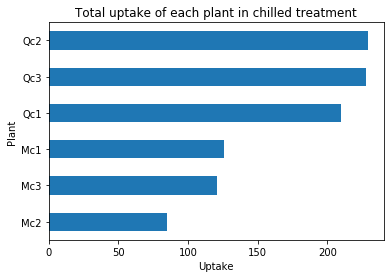

In [41]:
import matplotlib.pyplot as plt
chilleds.groupby("Plant")["uptake"].sum().sort_values(ascending = True).plot.barh(title="Total uptake of each plant in chilled treatment")
plt.xlabel("Uptake")
plt.ylabel("Plant")

Text(0, 0.5, 'Plant')

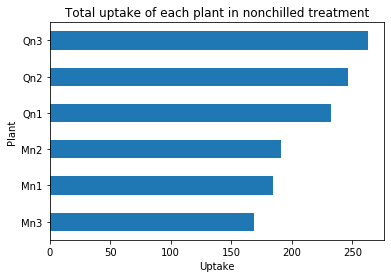

In [42]:
nonchilleds.groupby("Plant")["uptake"].sum().sort_values(ascending = True).plot.barh(title="Total uptake of each plant in nonchilled treatment")
plt.xlabel("Uptake")
plt.ylabel("Plant")

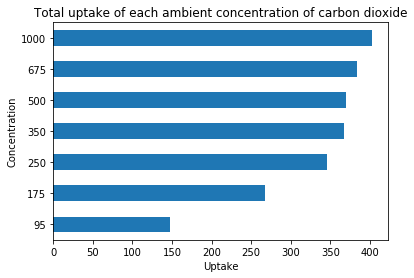

In [49]:
df.groupby("conc")["uptake"].sum().sort_values(ascending = True).plot.barh(title="Total uptake of each ambient concentration of carbon dioxide")
plt.xlabel("Uptake")
plt.ylabel("Concentration")
plt.show()